In [17]:
import pandas as pd
import numpy as np
import tensorflow as tf

data = pd.read_csv('churn.csv')

data = data.dropna()

encoded_data = pd.get_dummies(data, columns=['gender','region_category','joined_through_referral','membership_category','preferred_offer_types','medium_of_operation','internet_option','used_special_discount','offer_application_preference','past_complaint','complaint_status','feedback'])

boolean_cols = ['gender_F','gender_M','region_category_City','region_category_Town','region_category_Village','joined_through_referral_No','joined_through_referral_Yes','membership_category_Basic Membership','membership_category_Gold Membership','membership_category_No Membership','membership_category_Platinum Membership','membership_category_Premium Membership','membership_category_Silver Membership','preferred_offer_types_Credit/Debit Card Offers','preferred_offer_types_Gift Vouchers/Coupons','preferred_offer_types_Without Offers','medium_of_operation_Both','medium_of_operation_Desktop','medium_of_operation_Smartphone','internet_option_Fiber_Optic','internet_option_Mobile_Data','internet_option_Wi-Fi','used_special_discount_No','used_special_discount_Yes','offer_application_preference_No','offer_application_preference_Yes','past_complaint_No','past_complaint_Yes','complaint_status_No Information Available','complaint_status_Not Applicable','complaint_status_Solved','complaint_status_Solved in Follow-up','complaint_status_Unsolved','feedback_No reason specified','feedback_Poor Customer Service','feedback_Poor Product Quality','feedback_Poor Website','feedback_Products always in Stock','feedback_Quality Customer Care','feedback_Reasonable Price','feedback_Too many ads','feedback_User Friendly Website']

encoded_data[boolean_cols] = encoded_data[boolean_cols].replace({True: 1, False:0})

encoded_data.drop('user_id',axis=1,inplace=True)
encoded_data.drop('joining_date',axis=1,inplace=True)
encoded_data.drop('last_visit_time',axis=1,inplace=True)
encoded_data = encoded_data.rename(columns={'membership_category_Basic Membership':'membership_category_Basic_Membership'})
encoded_data = encoded_data.rename(columns={'membership_category_Gold Membership':'membership_category_Gold_Membership'})
encoded_data = encoded_data.rename(columns={'membership_category_No Membership':'membership_category_No_Membership'})
encoded_data = encoded_data.rename(columns={'membership_category_Platinum Membership':'membership_category_Platinum_Membership'})
encoded_data = encoded_data.rename(columns={'membership_category_Premium Membership':'membership_category_Premium_Membership'})
encoded_data = encoded_data.rename(columns={'membership_category_Silver Membership':'membership_category_Silver_Membership'})
encoded_data = encoded_data.rename(columns={'preferred_offer_types_Credit/Debit Card Offers':'preferred_offer_types_Credit_Debit_Card_Offers'})
encoded_data = encoded_data.rename(columns={'preferred_offer_types_Gift Vouchers/Coupons':'preferred_offer_types_Gift_Vouchers_Coupons'})
encoded_data = encoded_data.rename(columns={'preferred_offer_types_Without Offers':'preferred_offer_types_Without_Offers'})
encoded_data = encoded_data.rename(columns={'internet_option_Wi-Fi':'internet_option_Wi_Fi'})
encoded_data = encoded_data.rename(columns={'complaint_status_No Information Available':'complaint_status_No_Information_Available'})
encoded_data = encoded_data.rename(columns={'complaint_status_Not Applicable':'complaint_status_Not_Applicable'})
encoded_data = encoded_data.rename(columns={'complaint_status_Solved in Follow-up':'complaint_status_Solved_in_Follow_up'})
encoded_data = encoded_data.rename(columns={'feedback_No reason specified':'feedback_No_reason_specified'})
encoded_data = encoded_data.rename(columns={'feedback_Poor Customer Service':'feedback_Poor_Customer_Service'})
encoded_data = encoded_data.rename(columns={'feedback_Poor Product Quality':'feedback_Poor_Product_Quality'})
encoded_data = encoded_data.rename(columns={'feedback_Poor Website':'feedback_Poor_Website'})
encoded_data = encoded_data.rename(columns={'feedback_Products always in Stock':'feedback_Products_always_in_Stock'})
encoded_data = encoded_data.rename(columns={'feedback_Quality Customer Care':'feedback_Quality_Customer_Care'})
encoded_data = encoded_data.rename(columns={'feedback_Reasonable Price':'feedback_Reasonable_Price'})
encoded_data = encoded_data.rename(columns={'feedback_Too many ads':'feedback_Too_many_ads'})
encoded_data = encoded_data.rename(columns={'feedback_User Friendly Website':'feedback_User_Friendly_Website'})
from sklearn.model_selection import train_test_split

X = encoded_data.drop(['churn_risk_score'],axis=1)
y = encoded_data['churn_risk_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.preprocessing import StandardScaler

standard_cols = ['age','days_since_last_login','avg_time_spent','avg_transaction_value','avg_frequency_login_days','points_in_wallet']
sc = StandardScaler()
X_train[standard_cols] = sc.fit_transform(X_train[standard_cols])
X_test[standard_cols] = sc.fit_transform(X_test[standard_cols])


ANN

In [18]:
ann = tf.keras.models.Sequential()

First Layer

In [19]:
ann.add(tf.keras.layers.Dense(units=40,activation='relu'))

Second Layer

In [20]:
ann.add(tf.keras.layers.Dense(units=40,activation='relu'))

Output Layer

In [21]:
ann.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

compile

In [22]:
ann.compile(optimizer= 'adam' , loss= 'binary_crossentropy', metrics= ['accuracy'])

In [23]:
ann.fit(X_train.values, y_train.values, batch_size=32,epochs=10)

Epoch 1/10
572/572 [==============================] - 4s 5ms/step - loss: 0.3424 - accuracy: 0.8185
Epoch 2/10
572/572 [==============================] - 3s 5ms/step - loss: 0.2587 - accuracy: 0.8595
Epoch 3/10
572/572 [==============================] - 3s 5ms/step - loss: 0.2548 - accuracy: 0.8672
Epoch 4/10
572/572 [==============================] - 2s 4ms/step - loss: 0.2510 - accuracy: 0.8722
Epoch 5/10
572/572 [==============================] - 2s 4ms/step - loss: 0.2477 - accuracy: 0.8768
Epoch 6/10
572/572 [==============================] - 2s 4ms/step - loss: 0.2452 - accuracy: 0.8843
Epoch 7/10
572/572 [==============================] - 2s 4ms/step - loss: 0.2405 - accuracy: 0.8897
Epoch 8/10
572/572 [==============================] - 2s 4ms/step - loss: 0.2349 - accuracy: 0.8957
Epoch 9/10
572/572 [==============================] - 3s 5ms/step - loss: 0.2186 - accuracy: 0.9135
Epoch 10/10
572/572 [==============================] - 2s 4ms/step - loss: 0.1982 - accuracy: 0.9238

Confusion Matrix

143/143 [==============================] - 0s 3ms/step


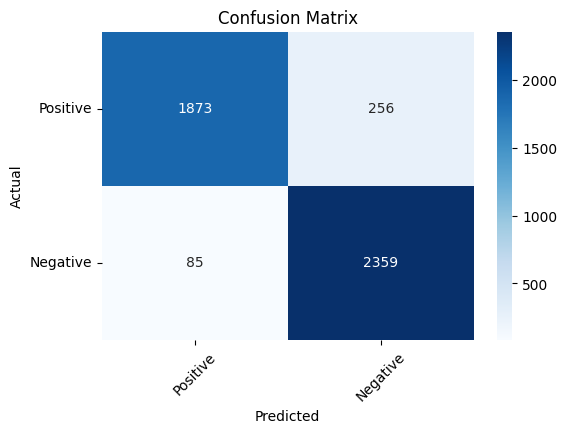

In [24]:
from sklearn.metrics import confusion_matrix
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
cm = confusion_matrix(y_test,y_pred)

import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(confusion_matrix, labels_A, labels_P):
    plt.figure(figsize=(6, 4))
    ax = sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
    ax.set_xticklabels(labels_A, rotation=45)
    ax.set_yticklabels(labels_P, rotation=0)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    plt.title('Confusion Matrix')

confusion_matrix = cm
labels_A = ['Positive','Negative']
labels_P = ['Positive','Negative']



plot_confusion_matrix(confusion_matrix, labels_A, labels_P)
plt.show()

In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9254318827902909

In [26]:
from joblib import dump

In [28]:
dump(ann,'/home/gunes/Bitirme/django-venv/src/churn/savedModels/ann.joblib')

['/home/gunes/Bitirme/django-venv/src/churn/savedModels/ann.joblib']